In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from lineartree import LinearTreeRegressor

In [24]:
f1 = lambda x: 20 * x + 3
f2 = lambda x: 35 * x - 17
f3 = lambda x: -21 * x - 18
f4 = lambda x: -10 * x - 4.7

LEN = 1_000
X = np.random.normal(0, 1, LEN).reshape((-1, 1))
y = np.zeros(LEN)

y[X[:, 0] < -0.5] = f1(X[:, 0][X[:, 0] < -0.5])
y[abs(X[:,0]) <= 0.5] = f2(X[:, 0][abs(X[:, 0]) <= 0.5])
y[X[:, 0] > 0.5] = f3(X[:, 0][X[:, 0] > 0.5])
y[X[:,0] > 1] = f4(X[:, 0][X[:, 0] > 1])

y += np.random.normal(0, 1, LEN)

X_train = X[:900]
y_train = y[:900]

X_test = X[900:]
y_test = y[900:]

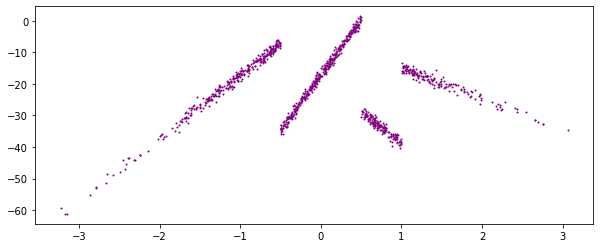

In [26]:
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], y, s=1, color='purple')

### Linear Regression

In [16]:
def get_rmse(preds, actual):
    return np.sqrt(np.mean((preds - actual) ** 2))

In [20]:
def plot_results(y_test, pred):
    plt.figure(figsize=(10,4))
    plt.scatter(X_test[:, 0], y_test, label='truth')
    plt.scatter(X_test[:, 0], pred, label='pred')
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.legend(fontsize=20)
    rmse = round(get_rmse(pred, y_test), 2)
    plt.title(f'RMSE={rmse}', fontsize=20)    

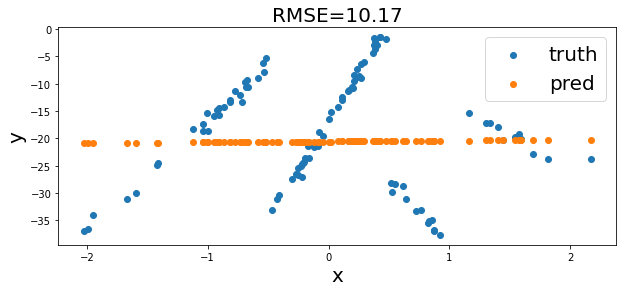

In [21]:
LR = LinearRegression()
LR.fit(X_train, y_train)
pred = LR.predict(X_test)
plot_results(y_test, pred)

### Decision Tree Regressor

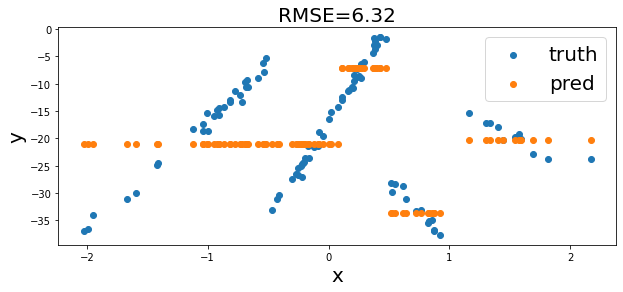

In [22]:
DTR = DecisionTreeRegressor(max_depth=2)
DTR.fit(X_train, y_train)
pred = DTR.predict(X_test)
plot_results(y_test, pred)

### Linear Tree Regressor

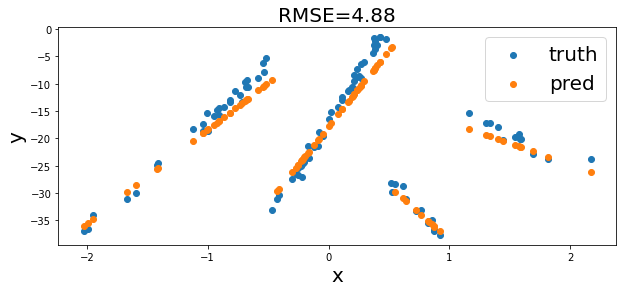

In [23]:
LTR = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=2)
LTR.fit(X_train, y_train)
pred = LTR.predict(X_test)
plot_results(y_test, pred)